In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Create a directory to save the feature maps
output_dir = 'feature_maps'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [3]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
X_train, y_train = load_mnist('fashionmnist', kind='train')
X_test, y_test = load_mnist('fashionmnist', kind='t10k')

In [5]:
X_test.shape

(10000, 784)

In [6]:
X_train.shape

(60000, 784)

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [8]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

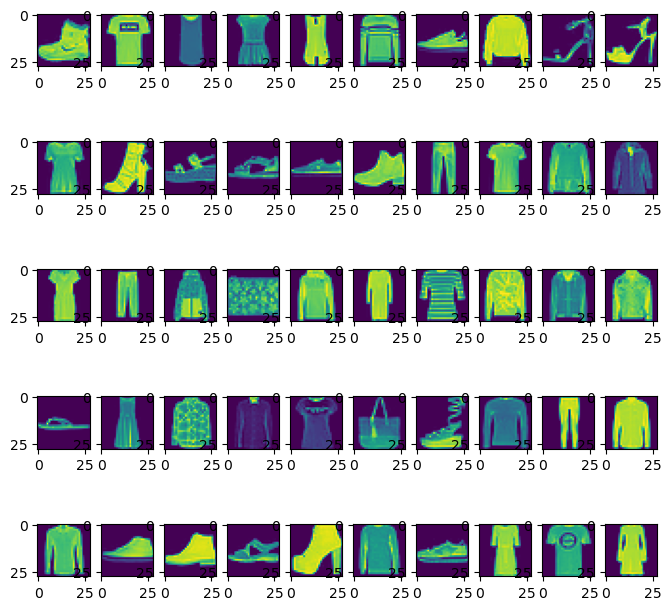

In [9]:
fig, axes = plt.subplots(5,10, figsize=(8,8))

for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i])

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    
    Conv2D(16, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    
    Conv2D(16, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

C:\Users\PAYA-RAYANEH-NS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)       │ (None, 30, 30, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_1 (ZeroPadding2D)     │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_2 (ZeroPadding2D)     │ (None, 9, 9, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_3 (ZeroPadding2D)     │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,882 (85.48 KB)

 Trainable params: 21,882 (85.48 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# plot_model(model, to_file='model_test.png', show_shapes=True, show_layer_names=True)

In [14]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [15]:
history = model.fit(X_train, y_train_ohe, epochs=10, validation_data=(X_test, y_test_ohe), batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.5191 - loss: 1.2743 - val_accuracy: 0.8050 - val_loss: 0.6398
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.7925 - loss: 0.5645 - val_accuracy: 0.8312 - val_loss: 0.5599
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.8222 - loss: 0.4948 - val_accuracy: 0.8567 - val_loss: 0.4677
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.8356 - loss: 0.4584 - val_accuracy: 0.8555 - val_loss: 0.4743
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.8505 - loss: 0.4170 - val_accuracy: 0.8717 - val_loss: 0.4261
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.8534 - loss: 0.4009 - val_accuracy: 0.8723 - val_loss: 0.4034
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.8659 - loss: 0.3763 - val_accuracy: 0.8819 - val_loss: 0.3836
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.8708 - loss: 0.3639 - 

<Axes: >

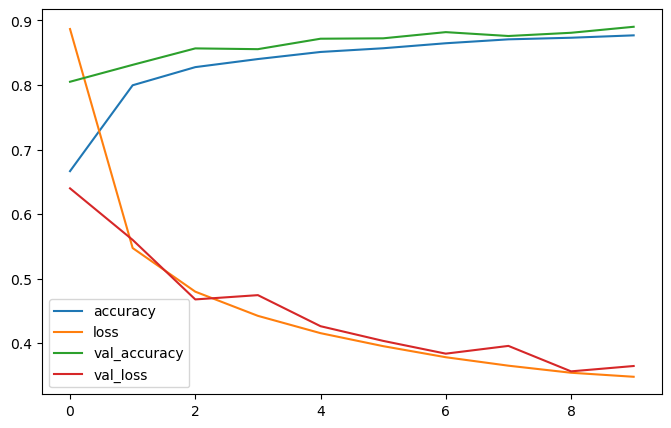

In [16]:
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pd.DataFrame(history.history).plot(figsize=(8,5))

In [17]:
# history.history

In [18]:
model.save('FashionMnist.keras')

In [19]:
for index, layer in enumerate(model.layers):
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(index, layer.name , filters.shape)

1 conv2d (3, 3, 1, 16)
5 conv2d_1 (3, 3, 16, 16)
9 conv2d_2 (3, 3, 16, 32)
13 conv2d_3 (3, 3, 32, 32)


Layer Number:  1
The name of the layer:  conv2d
The shape of the layer filter:  (3, 3, 1, 16)


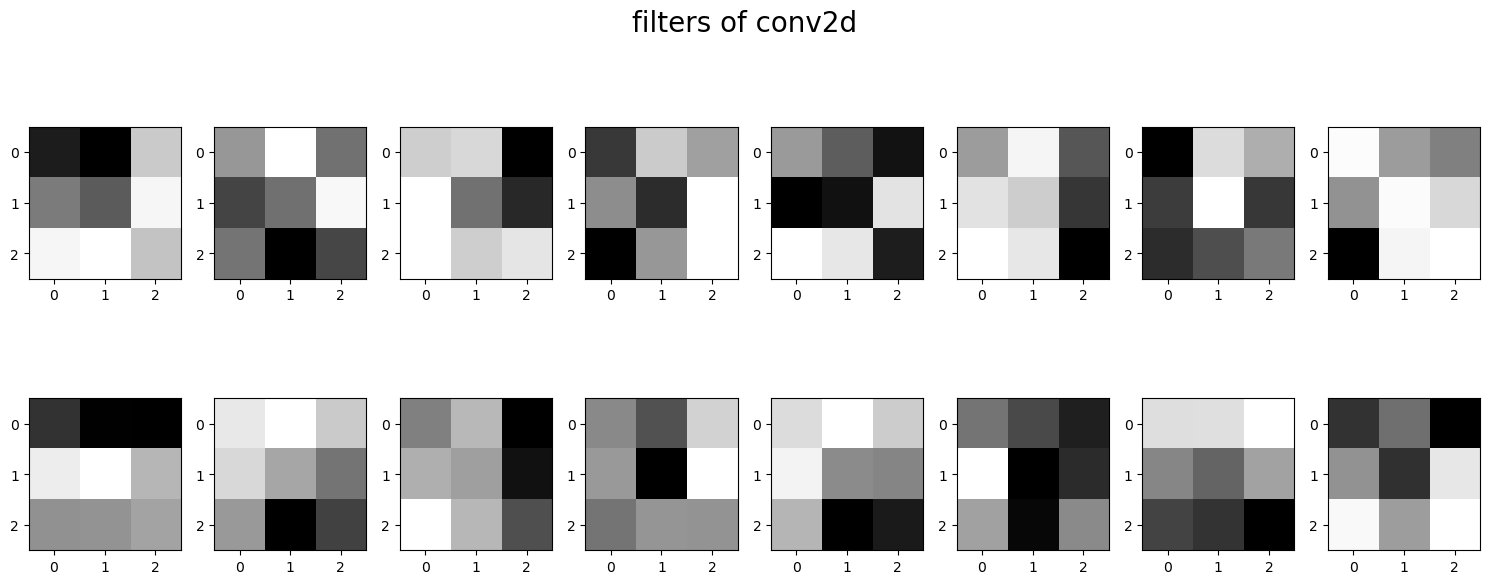

------------------------------------------------------------------------------------------------------------------------
Layer Number:  5
The name of the layer:  conv2d_1
The shape of the layer filter:  (3, 3, 16, 16)


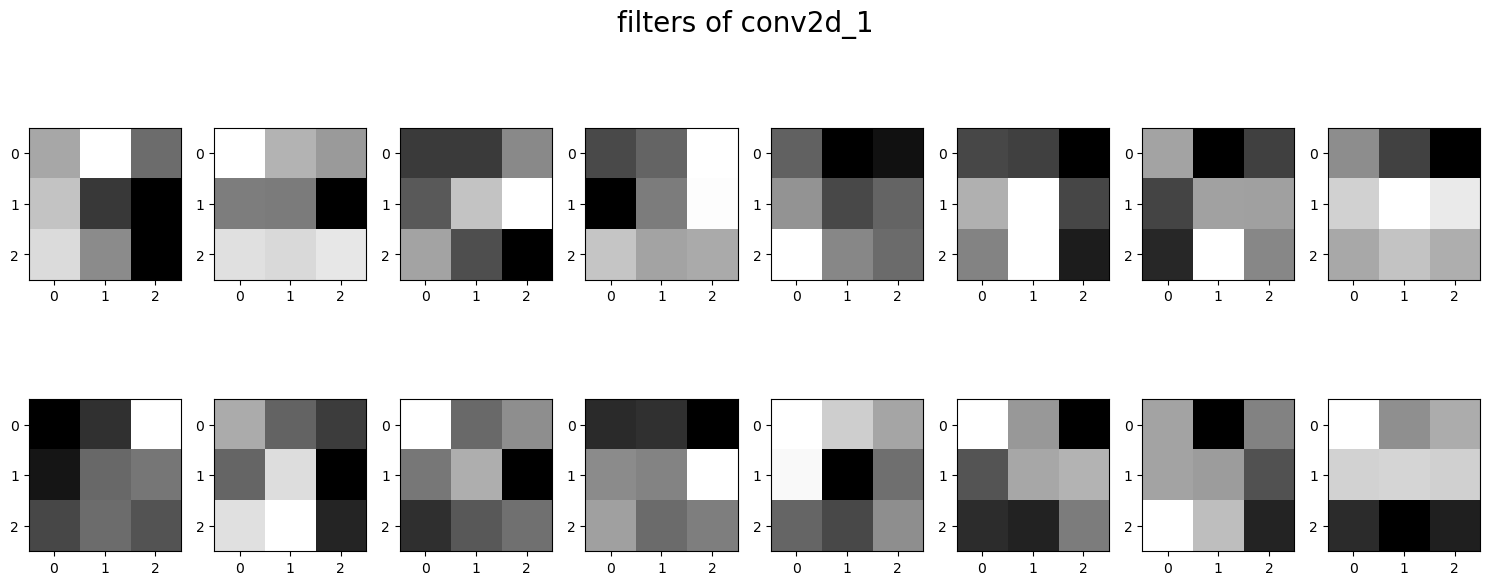

------------------------------------------------------------------------------------------------------------------------
Layer Number:  9
The name of the layer:  conv2d_2
The shape of the layer filter:  (3, 3, 16, 32)


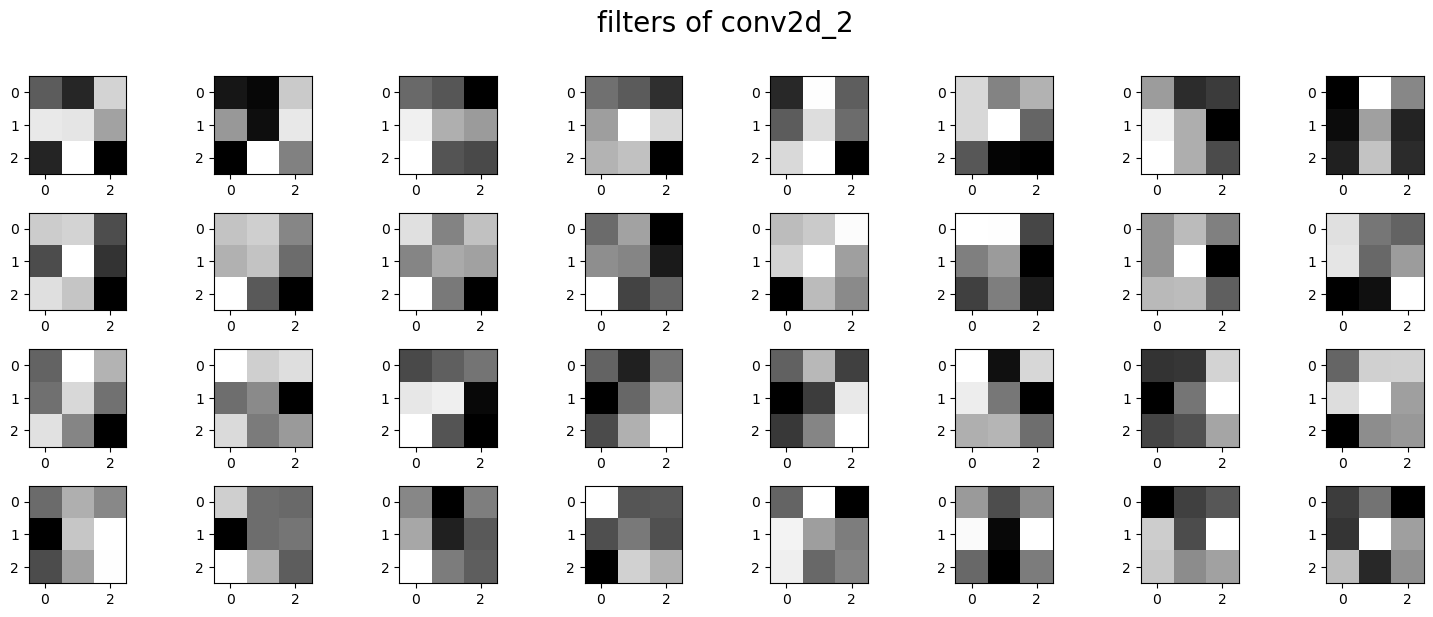

------------------------------------------------------------------------------------------------------------------------
Layer Number:  13
The name of the layer:  conv2d_3
The shape of the layer filter:  (3, 3, 32, 32)


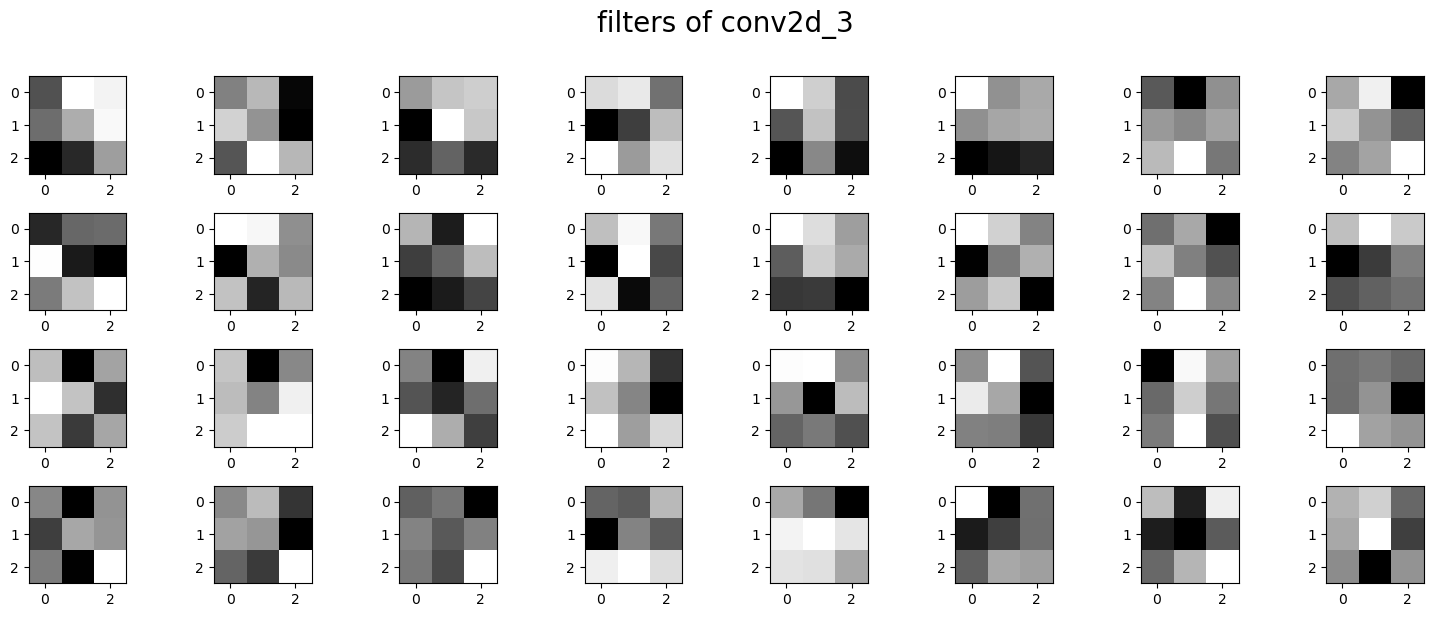

------------------------------------------------------------------------------------------------------------------------


In [21]:
for index, layer in enumerate(model.layers):
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    
    print("Layer Number: ", index)
    print("The name of the layer: ", layer.name)
    print("The shape of the layer filter: ", filters.shape)
    
    
    # Disply filter of each layer
    n_filters =filters.shape[-1]
    ix=1
    fig = plt.figure(figsize=(15,45))
    fig.suptitle(f"filters of {layer.name}\n\n\n" , fontsize=20)
    for i in range(n_filters):
        # get the filters
        f = filters[:,:,:,i]
        for j in range(1):
            # subplot filters
            plt.subplot(n_filters,8,ix)
            plt.imshow(f[:,:,j], cmap='gray')
            ix+=1
    #plot the filters
    fig.tight_layout()
    plt.savefig(os.path.join(output_dir, f'filters of {layer.name}.png'))
    plt.show()
    print("-"* 120)

In [22]:
base_model = Model(inputs=model.inputs , outputs=model.layers[1].output)

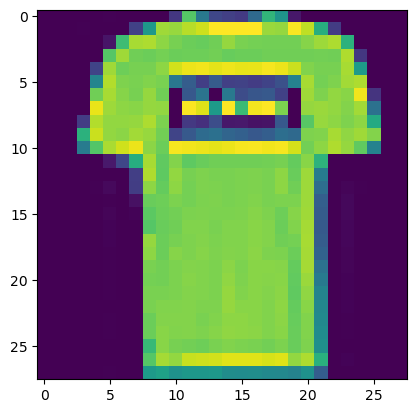

In [23]:
image = X_train[1] / 255.0
plt.imshow(image)
img_array = np.expand_dims(image, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


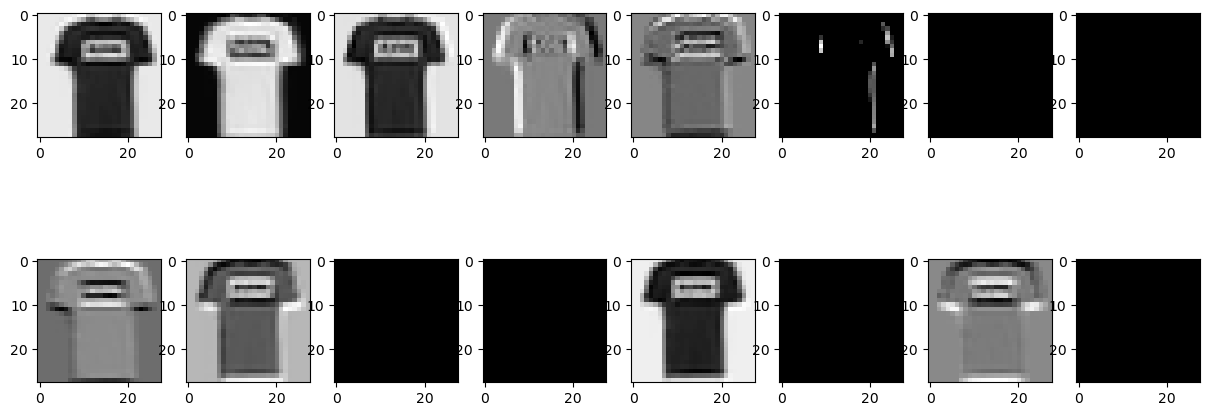

In [24]:
#calculating features_map
features = base_model.predict(img_array)

fig = plt.figure(figsize=(15,25))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1], cmap='gray')
    
plt.show()

In [25]:
# Load and preprocess an image
image = X_train[1] / 255.0

img_array = np.expand_dims(image, axis=0)

In [26]:
# Get the outputs of each convolutional layer
layer_name = [layer.name for layer in model.layers if 'conv' in layer.name]

# Get the outputs of each convolutional layer
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]

# Create a model that will return these outputs given the model input
activation_model = Model(inputs=model.inputs, outputs=layer_outputs)

In [27]:
# Get the feature maps
activations = activation_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


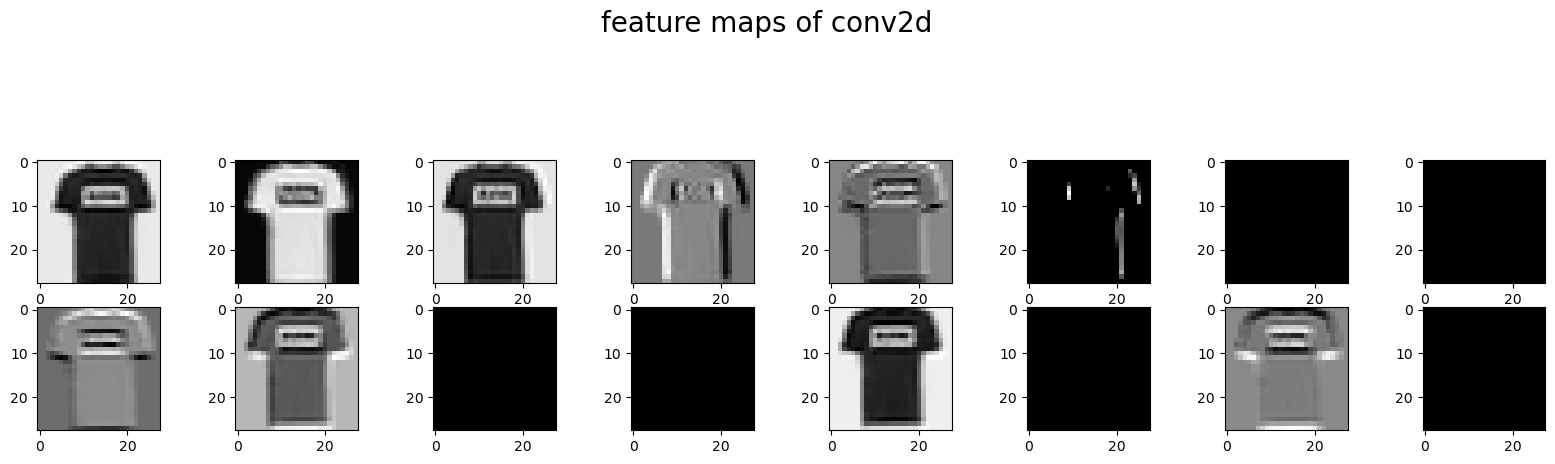

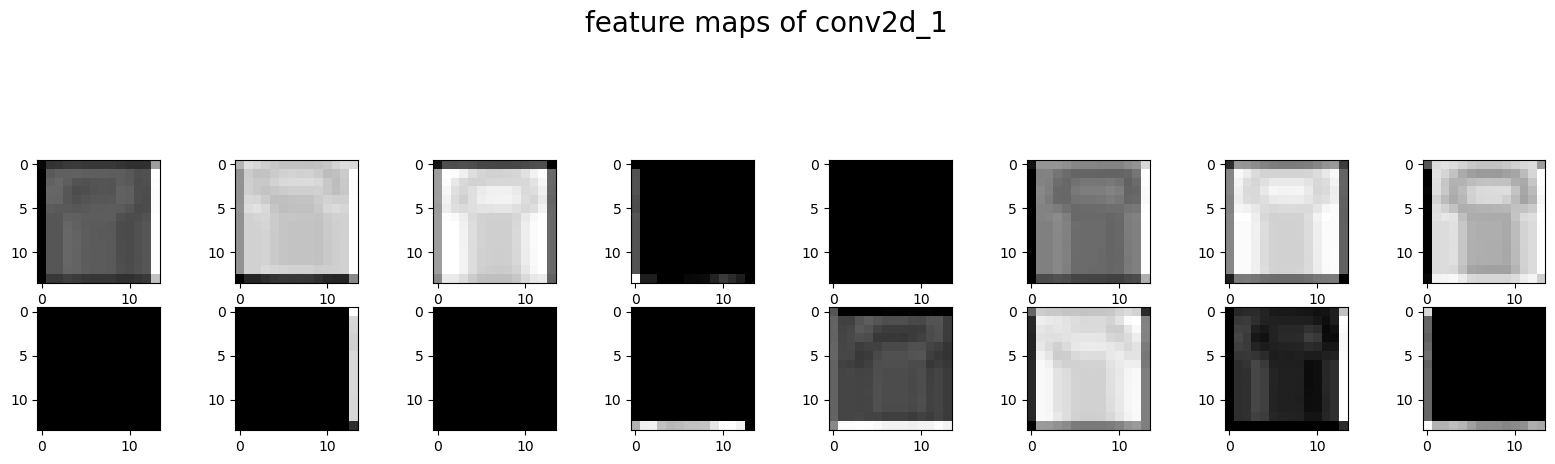

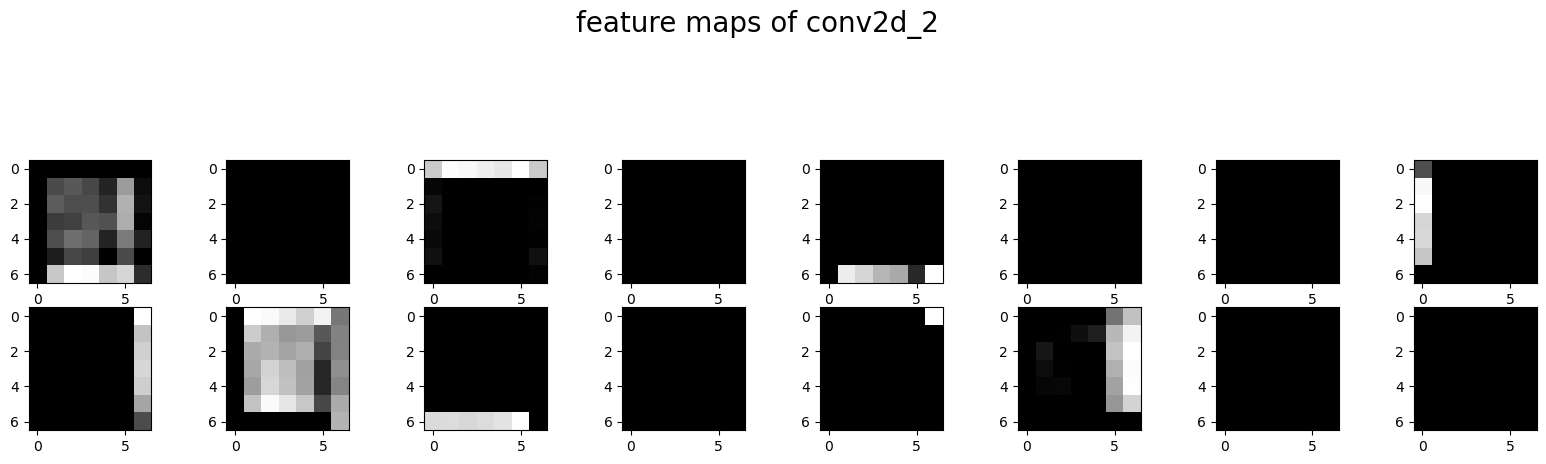

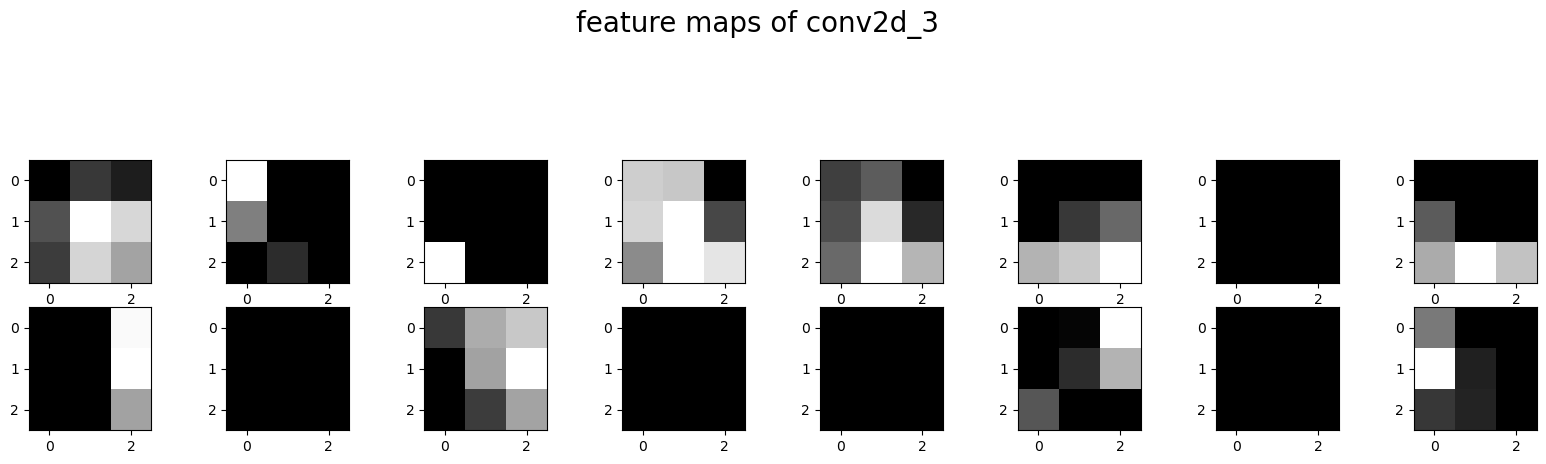

In [28]:
for name, fmap in zip(layer_name, activations):
    
    fig = plt.figure(figsize=(20,15))
    fig.suptitle(f'feature maps of {name}' , fontsize=20)
    
    for i in range(1,features.shape[3]+1):
        
        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1] , cmap='gray')
        plt.savefig(os.path.join(output_dir, f'feature maps of {name}.png'))
    
plt.show()

## Explanation of Feature Maps
### Feature Maps at the Beginning of the Network:

* Low-Level Features: 
The initial layers of the network capture low-level features such as edges, textures, and simple patterns. These features are relatively generic and can be found in many different types of images.
* High Resolution:
The feature maps at these layers retain much of the spatial resolution of the original image, meaning they are large in width and height.

### Feature Maps at the End of the Network:
* High-Level Features: 
The later layers of the network capture high-level, abstract features such as shapes, objects, and specific parts of objects. These features are more complex and more specific to the types of objects the network was trained to recognize.
* Reduced Resolution:
The feature maps at these layers are typically smaller in width and height due to the pooling operations that reduce spatial dimensions while increasing the depth of the feature maps.
Visualization Description:

* Early Layers:
The visualizations of the early layers' feature maps show clear edges and simple textures. These maps are often interpretable by humans as they resemble basic image components.
* Later Layers:
The visualizations of the later layers' feature maps are more abstract and less interpretable. They represent combinations of features detected in earlier layers, forming more complex patterns that correspond to high-level concepts the network has learned.
By saving and examining the feature maps from different layers, we can gain insights into how the network processes and transforms the input image through its layers to ultimately make a prediction.

In [ ]:
# MasoudKaviani.ir